<a href="https://colab.research.google.com/github/DiegoPincheiraIb/ME4707_Assignments/blob/main/Assignment_2/T2_ME4707_DiegoP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 2: Algoritmos Genéticos

ME4707 - Robótica - Semestre 2021-2

Profesor: Juan C. Zagal - Auxiliar: Raimundo Lorca - Laboratorios: Gaspar Fábrega 

# Introducción
La evolución artificial se hace cada vez más presente en el mundo; a medida que aumenta la capacidad
computacional disponible, esta gana relevancia en todo tipo de áreas al permitir el desarrollo de inteligencia
artificial, y la solución de distintos tipos de problemas. Existen distintas formas de aplicar evolución computacional
a un sistema, pero todas tienen un principio en común, la inspiración en la evolución biológica; se
replica la supervivencia del más fuerte mediante la modelación de individuos con código genético, los cuales
pueden mutar y reproducirse, de acuerdo a una medida de su desempeño en el entorno.

En este contexto, los algoritmos genéticos representan solo una parte de la evolución computacional, pero
se destacan por su relativa simplicidad, y utilidad en una gran variedad de campos. Los algoritmos genéticos
son capaces de resolver una vasta cantidad de problemas, a veces obteniendo soluciones que sería virtualmente
imposible ser concebidas por la mente humana; sin embargo, pueden ser superados en eficiencia
por algoritmos especializados en problemas particulares, pero su alta capacidad de aplicación los convierte en
una valiosa herramienta.

Con el objetivo de introducir, y mostrar el poder de los algoritmos genéticos, se propone esta tarea, la
cual consiste en 5 problemas para los que se crearan distintos algoritmos genéticos en Python, con el fin de
solucionarlos y analizarlos.

## Documentación
La tarea se desarrollará en [Google Colab](https://colab.research.google.com/) en un entorno de Python 3 utilizando las librerías `pyevolve` y `neat-python`, no obstante, estas se irán introduciendo a medida que los problemas las requieran.
Sus documentaciones se encuentran en los siguientes links:

- http://pyevolve.sourceforge.net/
- https://neat-python.readthedocs.io/en/latest/



# Problema 1
Para comenzar, conviene familiarizarse con Python y con el concepto de algoritmos genéticos. Para esto, se propone un problema simple de bajo nivel que debe desarrollar desde cero, creando un algoritmo genético sin la ayuda de librerías especializadas como `pyevolve`. 

El problema se trata de encontrar el máximo de la siguiente función cuadrática:  

<div align="center"> $-x^2 + 100, -10 < x < 10$ </div>


Para esto, cada potencial solución, es decir, cada individuo de la población, debe representar un número real
posible para $x$. La forma más sencilla de hacer esto, es que cada individuo consista en un `float` dentro del rango especificado.

Para el Crossover (Cruzamiento), una buena opción es crear un hijo tal que este sea el promedio aritmético entre los padres. En cambio, para la mutación, una opción es que el valor del único gen del individuo cambie a un valor aleatorio entre
[-10, 10].

De los 3 tipos de selección comunes, uno conveniente para este problema es la selección por Torneo, aunque en general, el tipo de selección más usado es el de Ruleta.

Finalmente, la función de Fitness es simplemente calcular -x^2 + 100, siendo x el valor del individuo al que
se le está calculando su fitness.

En resumen,

    Genome: Número real entre [-10, 10].
    Crossover: Promedio aritmético.
    Mutation: Valor random entre [-10, 10].
    Selection: Torneo.
    Función Fitness: Función f(x).

A continuación se presenta una plantilla que le ayudará a crear el algoritmo, junto con instrucciones más específicas.



In [ ]:
# importar librerías
import random
import copy
import numpy as np

# es importante destacar que python asigna variables a valores u objetos, no al 
# revés; esto quiere decir que que si se tiene x=[1, 2] & y=x, si se aplica 
# y.append(3)  (agrega el valor 3 al final de la lista), print y   devuelve 
# [1, 2, 3]  &  print x devuelve [1, 2, 3], ambas listas se modifican ya que 
# ambas variables estan asignadas al mismo objeto, y lo que se modifica es el 
# objeto en si; la libreria copy ayuda con esto, al generar una copia del objeto
# usando y=copy.copy(x) , asi se asigna cada variable a un objeto distinto

# ------------------------------------------------------------------------------
def Initializator(n_min, n_max):
	"""
	-> float

	El método de inicialización se encarga de crear los individuos que servirán
	población inicial.
	Este tiene que seguir la representación de individuo que se usará en el
	algoritmo. En este caso, los individuos consisten en floats aleatorios dentro
	del rango [-10, 10].

	:param float n_min: límite inferior del rango.
	:param float n_max: límite superior del rango.

	:return: float random dentro del rango.

	** considere usar random.uniform() **
	"""

	# generar individuo aletoriamente
	indiv = random.uniform(n_min, n_max)

	return indiv


# ------------------------------------------------------------------------------
def Crossover(indiv_1, indiv_2, prob=0.5):
	"""
	-> float

	El método de cruzamiento toma 2 individuos, los cruza y retorna un nuevo
	individuo. Este cruzamiento debe ser consistente con la representación de los
	individuos.
	En este caso, reproducir un par de individuos es calcular el promedio
	aritmético entre estos, retornando el resultado como nuevo individuo.
	Esta función también incluye una probabilidad de que ocurra el cruzamiento,
	pues una par de individuos pueden intentar reproducirse y no lograrlo. Si no
	se logra la reproducción, retorne aleatoriamente alguno de los padres.

	:param float indiv_1:
	:param float indiv_2:
	:param float prob: probabilidad de que se produzca cruzamiento (default: 0.5).

	:return: float correspondiente al nuevo individuo.

	** considere usar random.random() y random.choice() **
	"""

	# elegir aleatoriamente a uno de los padres como nuevo individuo
	new_indiv = random.choice([indiv_1, indiv_2])

	# si ocurre cruzamiento
	if random.random() < prob:
		# calcular nuevo individuo
		new_indiv = np.mean([indiv_1, indiv_2])

	return new_indiv

# ------------------------------------------------------------------------------
def Mutator(indiv, n_min, n_max, prob=0.1):
	"""
	-> float

	El método de mutación toma un individuo y lo varía, lo cual nuevamente debe
	ser consistente con la representación de los individuos.
	En este caso, mutar un individuo es reemplazar su valor por un valor aleatorio
	dentro del rango.
	Esta función también incluye una probabilidad de que ocurra mutación, un
	individuo puede no mutar. Si el individuo no logra mutar, retorne su valor
	original.

	:param float indiv: individuo a mutar.
	:param float n_min: límite inferior del rango.
	:param float n_max: límite superior del rango.
	:param float prob: probabilidad de mutación (default: 0.1).

	:return: float correspondiente al nuevo individuo.

	** considere usar random.uniform() **
	"""

	new_indiv = indiv

	# si ocurre mutación
	if random.random() < prob:
		# reasignar el valor del individuo
		new_indiv = random.uniform(n_min, n_max)

	return new_indiv

# ------------------------------------------------------------------------------	
def eval_fitness(indiv):
	"""
	-> float

	La función de fitness se encarga de evaluar que tan bueno es el individuo y
	le asigna el valor numérico correspondiente, mientras mejor sea el individuo,
	mayor será su fitness.
	En este caso, el fitness consiste en la expresión cuadrática del problema.

	:param float indiv: individuo a evaluar.

	:return: valor de su fitness.
	"""

	# calcular fitness
	score = -1*(indiv**2) + 100

	return score

# ------------------------------------------------------------------------------	
def Selector(population, k=15):
	"""
	-> tuple: float, list(float)

	El método de selección se encarga de seleccionar que individuos de la
	población se reproducirán para generar la nueva generación.
	Para este problema se usará la selección Tournament. Esta toma k individuos de
	la población, evalua su fitness y luego retorna separademente al mejor
	individuo del torneo y al resto de los (k-1) individuos.

	:param list(float) population: lista que contiene los individuos a evaluar.
	:param int k: tamaño del torneo a utilizar para la selección.

	:return: tupla (best_indiv, rest_tournament)
	
	** considere usar random.sample() **
	"""

	# tomar aleatoriamente k individuos de la población
	tournament = random.sample(population, k)

	# calcular el fitness de cada uno de los k individuos
	fitness_tour = [(eval_fitness(indiv), indiv) for indiv in tournament]

	# ordenar lista fitness_tour de mayor a menor
	fitness_tour.sort(reverse=True)
 
	# obtener mejor individuo
	best_fitness, best_indiv = fitness_tour[0]

	# obtener resto de los individuos
	tournament.remove(best_indiv)
	rest_tournament = tournament
 
	return best_indiv, rest_tournament

# ------------------------------------------------------------------------------
# ahora es momento de integrar todos los métodos anteriores para ejecutar el
# algoritmo genético.

# defina el número de individuos a contener en la población
POP_NUM = 50

# defina el intervalo númerico del problema
N_MIN = -10.0
N_MAX = 10.0

# defina las probabilidades de cruzamiento y mutación
PROB_CROSS = 0.4
PROB_MUT = 0.3

# defina la cantidad de generaciones/iteraciones que desea ejecutar
GEN_ITER = 40

# ------------------------------------------------------------------------------
# ** el código a continuación está completado **

# inicialización
POPULATION = [Initializator(N_MIN, N_MAX) for i in range(POP_NUM)]

# iteración/evolución
for i in range(GEN_ITER):

	# inicializar nueva generación
	NEW_POPULATION = []

	# mientras la nueva población no contenga POP_NUM individuos
	while len(NEW_POPULATION) < POP_NUM:

		# selección
		best_indiv, rest_tournament = Selector(POPULATION, k=15)
	
		# cruzamiento
		for indiv in rest_tournament:
			new_indiv = Crossover(best_indiv, indiv, prob=PROB_CROSS)
	 
			# mutación
			new_indiv = Mutator(new_indiv, N_MIN, N_MAX, prob=PROB_MUT)
	 
	 		# agregar a la población
			NEW_POPULATION.append(new_indiv)
	 
	 		# verificar tamaño de la población
			if len(NEW_POPULATION) == POP_NUM:
				break

	POPULATION = NEW_POPULATION

# ------------------------------------------------------------------------------
# obtener mejor individuo
POP_FITNESS = [(eval_fitness(indiv), indiv) for indiv in POPULATION]
POP_FITNESS.sort(reverse=True)

BEST_FITNESS, BEST_INDIV = POP_FITNESS[0]

# display resultados
print('Generation: {:04d}'.format(GEN_ITER))
print('Best genome: {:.3f}'.format(BEST_INDIV))
print('     fitness: {:.3f}'.format(BEST_FITNESS))


Generation: 0040
Best genome: -0.000
     fitness: 100.000


# Problema 2
Como se mencionó anteriormente, existen librerías especializadas en Python que facilitan la implementación de algoritmos genéticos mediante una serie de módulos y utilidades.

Para introducir la librería `pyevolve`, a continuación se muestra una implementación para resolver el problema anterior. Para importar `pyevolve` ejecute el siguiente bloque de código, el cual lo cargará desde el github del curso.


In [ ]:
!git clone https://github.com/RaimundoLorca/roboticafcfm2021-2.git
%cd /content/roboticafcfm2021-2

Cloning into 'roboticafcfm2021-2'...
remote: Enumerating objects: 443, done.
remote: Counting objects: 100% (443/443), done.
remote: Compressing objects: 100% (432/432), done.
remote: Total 443 (delta 153), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (443/443), 7.25 MiB | 18.24 MiB/s, done.
Resolving deltas: 100% (153/153), done.
/content/roboticafcfm2021-2


Para configurar la representación o genoma de los individuos se debe utilizar uno de los cuatro módulos de `Chromosome/Representation` disponibles en la librería: `GAllele`, `G1DBinaryString`, `G1DList` y `G2DList`. Dado que en este caso los individuos consisten en números reales entre -10 y 10, se puede utilizar una lista de un solo valor `G1DList`.

In [ ]:
from pyevolve import G1DList
from pyevolve import Initializators
from pyevolve import Crossovers
from pyevolve import Mutators
from pyevolve import Selectors

from pyevolve import GSimpleGA

import random

# ------------------------------------------------------------------------------
def eval_fitness(chromosome):
  """
	-> float

	La función de fitness se encarga de evaluar que tan bueno es el individuo y
	le asigna el valor numérico correspondiente, mientras mejor sea el individuo,
	mayor será su fitness.
	En este caso, el fitness consiste en la expresión cuadrática del problema.

	:param list chromosome: lista que contiene el valor del individuo.

	:return: valor de su fitness/score.
	"""

  value = chromosome[0]

  # calcular fitness
  score = -value**2 + 100

  return score

# ------------------------------------------------------------------------------
def G1DListCrossoverAverage(genome, **args):
  """
  -> G1DList, G1DList

  The G1DList Average Crossover
  Each gene has a 50% chance of being the average between mom and dad's.
  """

  sister = None
  brother = None
  gMom = args["mom"]
  gDad = args["dad"]

  sister = gMom.clone()
  brother = gDad.clone()
  sister.resetStats()
  brother.resetStats()

  for i in range(len(gMom)):
    if random.random() < 0.5:
      sister[i] = (gMom[i] + gDad[i])/2.0
    else:
      brother[i] = (gMom[i] + gDad[i])/2.0

  return (sister, brother)

# ------------------------------------------------------------------------------
# defina el número de individuos a contener en la población
POP_NUM = 500

# defina el intervalo númerico del problema
N_MIN = -10.0
N_MAX = 10.0

# defina las probabilidades de cruzamiento y mutación
PROB_CROSS = 0.5
PROB_MUT = 0.1

# defina la cantidad de generaciones/iteraciones que desea ejecutar
GEN_ITER = 200

# ------------------------------------------------------------------------------
# configurar genoma
genome = G1DList.G1DList(1)
genome.setParams(rangemin=N_MIN, rangemax=N_MAX)

# configurar evaluación del fitness
genome.evaluator.set(eval_fitness)

# configurar métodos de inicialización, cruzamiento y mutación
# ** revisar documentación **
genome.initializator.set(Initializators.G1DListInitializatorReal)
genome.crossover.set(G1DListCrossoverAverage)
genome.mutator.set(Mutators.G1DListMutatorRealRange)

# configurar ejecución del algoritmo genético
GA_RUN = GSimpleGA.GSimpleGA(genome)
GA_RUN.setGenerations(GEN_ITER)

# configurar población
GA_RUN.setPopulationSize(POP_NUM)

# configurar probabilidades
GA_RUN.setCrossoverRate(PROB_CROSS)
GA_RUN.setMutationRate(PROB_MUT)

# configurar método de selección
GA_RUN.selector.set(Selectors.GTournamentSelector)

# ejecutar algoritmo genético
GA_RUN.evolve()

# ------------------------------------------------------------------------------
# obtener mejor individuo
bestIndividual = GA_RUN.bestIndividual()

BEST_FITNESS = bestIndividual.getFitnessScore()
BEST_SCORE = bestIndividual.getRawScore()
BEST_GENOME = bestIndividual.getInternalList()[0]

# display resultados
print('Generation: {:04d}'.format(GEN_ITER))
print('Best genome: ', BEST_GENOME)
print('     score: {:.3f}'.format(BEST_SCORE))
print('     fitness: {:.3f}'.format(BEST_FITNESS))

Generation: 0200
Best genome:  -1.296415452797338e-08
     score: 100.000
     fitness: 100.086


Ahora, si bien se utilizó `G1DList` como representación del genoma, el problema anterior tiene distintas posibles representaciones. Otra de ellas es representar el genoma de los individuos como un numero binario `G1DBinaryString`, es decir, como una lista de 0s y 1s que codifiquen un número real.

Para demostrar esto, en este problema se buscará el máximo de la siguiente función bidimensional:

$f(x,y) = \sin(x)\sin(y)\sqrt{x y}, 0 < x,y < 10$

Utilizando (inicialmente) una representación binaria de 4 bits para cada parámetro $x, y$. Así, el genoma resultante consiste en un `G1DBinaryString` de 8 valores. Note que tiene que aplicar una transformación lineal a los valores enteros que representan los bits de modo que se ajuste a los rangos del problema.

Por otro lado, se puede notar que los métodos de Crossover y Mutation del problema anterior no tienen sentido en esta representación binaria, por lo que se hace necesario utilizar métodos distintos. En este caso, pueden ser de ayuda los métodos de `G1DBinaryStringXUniform`, y `G1DBinaryStringMutatorFlip`.

Utilice además selección por Ruleta `GRouletteWheel`. Puede referirse a la documentación de `pyevolve` para buscar más información sobre estos métodos.


En resumen,

    Genome: Lista binaria de 8 genes, G1DBinaryString
    Crossover: Uniforme, G1DBinaryStringXUniform
    Mutation: Flip, G1DBinaryStringMutatorFlip
    Selection: Ruleta, GRouletteWheel
    Función Fitness: Función bidimensional f(x,y).

A continuación se presenta una plantilla que le ayudará a implementar el algoritmo usando `pyevolve`, junto con instrucciones más específicas.


Generation: 0600
Best genome:  [0, 0, 1, 1, 0, 0, 1, 1]
     score: 14.331
     fitness: 7.834


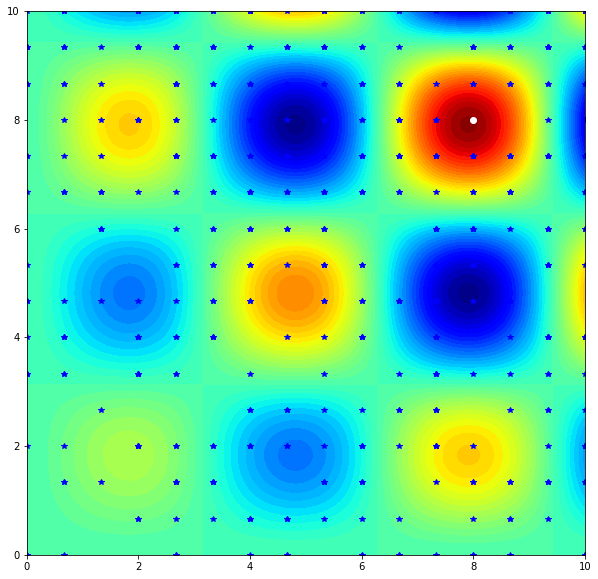

In [ ]:
from pyevolve import G1DBinaryString
from pyevolve import Initializators
from pyevolve import Crossovers
from pyevolve import Mutators
from pyevolve import Selectors

from pyevolve import GSimpleGA

import random
# ------------------------------------------------------------------------------
def BinaryStr2Num(binary_str, n_min, n_max):
  """
  -> float

  Transforma el número binario contenido en el string al número real
  correspondiente dentro del rango especificado.

  :param str binary_str: string que contiene el número binario
  :param float n_min: límite inferior del rango.
  :param float n_max: límite superior del rango.

  :return: valor float correspondiente
  """

  value = 0
  # por cada dígito en el str
  for i, num in enumerate(binary_str):
    value += num*2**i

  # escalar dentro del rango
  value = value/(2**len(binary_str) - 1)
  value = (n_max - n_min)*value + n_min

  return value

# ------------------------------------------------------------------------------
# en el caso de muchas librerias como pyevolve, el fitness real es una
# transformacion (lineal, gaussiana, etc) del score entregado por la funcion de
# evaluacion, por lo que en la pantalla de comando sale un Score o Raw, que
# corresponde al valor entregado por la funcion, y ademas un Fitness, que viene
# siendo el escalado del Score.


# definir la funcion de evaluacion del problema
def eval_fitness(chromosome):
  """
  -> float

  Transforma la lista binaria de chromosome en los parámetros numéricos x e y.
  Luego, evalúa la expresión f(x,y) para obtener el fitness del individuo.

  :param str chromosome: numero binario que contiene el genoma del individuo.

  :return: fitness del individuo
  """
  global N_MIN
  global N_MAX

  # obtener valores x e y a partir del chromosoma.
  # considere que la primera mitad corresponde a x, y la segunda mitad a y.
  # ** utilice la función BinaryStr2Num **
  mitad = int( len(chromosome)/2 )
  x_bin = chromosome[0:mitad]
  y_bin = chromosome[mitad:]
  x = BinaryStr2Num(x_bin, N_MIN, N_MAX)
  y = BinaryStr2Num(y_bin, N_MIN, N_MAX)

  # calcule el fitness a partir de la expresión f(x,y)
  # tenga cuidado con que el fitness/score no puede ser negativo
  score = np.sin(x) * np.sin(y) * np.sqrt(x*y) + 6.5
  return score

# ------------------------------------------------------------------------------
# defina el número de individuos a contener en la población
POP_NUM = 500

# defina el intervalo númerico del problema
N_MIN = 0.0
N_MAX = 10.0

# defina las probabilidades de cruzamiento y mutación
PROB_CROSS = 0.5
PROB_MUT = 0.1

# defina la cantidad de generaciones/iteraciones que desea ejecutar
GEN_ITER = 600

# ------------------------------------------------------------------------------
# configurar genoma
BINARY_SIZE = 8
genome = G1DBinaryString.G1DBinaryString(BINARY_SIZE)

# configurar evaluación del fitness
genome.evaluator.set(eval_fitness)

# configurar métodos de inicialización, cruzamiento y mutación
# ** revisar documentación **
genome.initializator.set( Initializators.G1DBinaryStringInitializator)
genome.crossover.set(Crossovers.G1DBinaryStringXUniform )
genome.mutator.set(Mutators.G1DBinaryStringMutatorFlip)

# configurar ejecución del algoritmo genético
GA_RUN = GSimpleGA.GSimpleGA(genome)
GA_RUN.setGenerations(GEN_ITER)

# configurar población
GA_RUN.setPopulationSize(POP_NUM)

# configurar probabilidades
GA_RUN.setCrossoverRate(PROB_CROSS)
GA_RUN.setMutationRate(PROB_MUT)

# configurar método de selección
GA_RUN.selector.set( Selectors.GRouletteWheel)

# ejecutar algoritmo genético
GA_RUN.evolve()

# ------------------------------------------------------------------------------
# ** el código a continuación está completado **
# obtener mejor individuo
bestIndividual = GA_RUN.bestIndividual()

BEST_FITNESS = bestIndividual.getFitnessScore()
BEST_SCORE = bestIndividual.getRawScore()
BEST_GENOME = bestIndividual.getInternalList()

# display resultados
print('Generation: {:04d}'.format(GEN_ITER))
print('Best genome: ', BEST_GENOME)
print('     score: {:.3f}'.format(BEST_SCORE))
print('     fitness: {:.3f}'.format(BEST_FITNESS))

# ------------------------------------------------------------------------------
# ** el código a continuación está completado **
# plotear última generación
import matplotlib.pyplot as plt
import numpy as np

# generar plot
res = 256
x = np.linspace(N_MIN, N_MAX, res)
y = np.linspace(N_MIN, N_MAX, res)

# inicializar imagen
z = np.zeros((res, res))
for i in range(res):
  for j in range(res):
    # evaluar función
    z[j, i] = np.sin(x[i])*np.sin(y[j])*np.sqrt(x[i]*y[j])

# plotear mapa
fig=plt.figure(figsize=(10,10))
plt.contourf(x, y, z, 50, cmap='jet')

# plotear generación
POPULATION_LIST = GA_RUN.getPopulation().internalPop
for indiv in POPULATION_LIST:
  chromosome = indiv.getInternalList()

  binary_len = int( len(chromosome)/2 )

  x = BinaryStr2Num(chromosome[0:binary_len], 0, 10)
  y = BinaryStr2Num(chromosome[binary_len:binary_len*2], 0, 10)

  plt.plot(x, y, 'b*')

# plotear mejor individuo
chromosome = BEST_GENOME
binary_len = int( len(chromosome)/2 )

x = BinaryStr2Num(chromosome[0:binary_len], 0, 10)
y = BinaryStr2Num(chromosome[binary_len:binary_len*2], 0, 10)
plt.plot(x, y, 'wo')

Responda:

1.   **¿Qué resultado obtuvo el algoritmo?, ¿Tiene sentido?**

  Respuesta: Como se aprecia en el gráfico, el algoritmo arrojó el punto en el máximo (la meseta roja). Tiene sentido debido a que itera sobre la función y va descartando aquellos valores que no aumenten el score.

2.   **¿Corresponde al máximo global de la función?, ¿Es esto normal?, ¿Por qué?. Pruebe con un genoma de 10 bits por valor.**

  Respuesta: Este coincide con el máximo global de la función. 
3.   **Considerando que el problema también puede ser resuelto usando reales en vez de binarios. ¿Cuál representación podría ser mejor respecto a la convergencia del algoritmo? Explique.**
  Respuesta: 

# Problema 3
El problema de la mochila, o [Knapsack Problem](https://es.wikipedia.org/wiki/Problema_de_la_mochila), puede ser abordado usando algoritmos genéticos.
Considere que tiene una mochila con un cierto límite de peso, y que quiere llevar la mayor cantidad de objetos valiosos en ella, donde cada objeto tiene su propio peso y valor. Esto resulta en que el valor (en dinero) a
llevar está sujeto a los limites máximos de la mochila, debido a que no se pueden llevar todos los objetos por la restricción de peso. La idea es no evaluar todas las combinaciones posibles, y dejar que el algoritmo se encargue de encontrar una buena solución.

En este caso se puede usar una codificación bastante útil para el problema, cada objeto tiene solo 2 opciones, NO se lleva o SI se lleva, una decisión binaria; entonces se puede crear un genoma donde cada gen represente un objeto, y cada uno tome los valores de 0 o 1. De esta manera cada posible solución se corresponde con un posible genoma.

Considere un límite de peso para la mochila de 2000.

Es importante notar que, si bien todas las posibles soluciones del problema son expresables por un genoma, la representación del genoma también permite 'posibles soluciones' (genomas) del algoritmo, que no son solución del problema real (como que se lleven todos los objetos, un genoma lleno de 1s). Pero esto es solucionable castigando el fitness de estos individuos; si un individuo se pasa del límite de peso, se puede penalizar el valor fitness de éste multiplicando 'cuanto se pasó' por algún factor considerable, y restárselo al fitness; de esta manera los individuos tenderán a no pasarse del peso.

A continuación se presenta una plantilla para resolver el problema. Use los métodos de Crossover, Mutation y Selection que estime convenientes. Por otro lado, la función fitness debe maximizar el valor contenido en la mochila. Los datos se encuentran en el archivo `docs/objetos.csv`.


In [ ]:
from pyevolve import G1DBinaryString
from pyevolve import Initializators
from pyevolve import Crossovers
from pyevolve import Mutators
from pyevolve import Selectors

from pyevolve import GSimpleGA

import pandas as pd
import random
# ------------------------------------------------------------------------------
# cargar información de los objetos como pandas DataFrame
db = pd.read_csv('/content/roboticafcfm2021-2/tarea_02/docs/objetos.csv')

# cantidad total de objetos
ITEMS = db.index.size

# puede acceder a la información mediante .at[index, column]
peso_1 = db.at[1, 'peso']

# ------------------------------------------------------------------------------
# definir la función de evaluación del problema

# para la función de evaluación, sume los valores de los objetos que estan
# en la mochila (en binario: 1 si esta dentro, 0 si no), y tambien los pesos si
# el peso se pasa del límite, reduzca el score de manera proporcional al exceso.

def eval_fitness(chromosome):
  """
  -> float

  Interpreta el contenido de la mochila a partir de la lista binaria contenida
  en chromosome. Calcula el fitness a partir del valor total contenido en la
  mochila y descuenta según el exceso de peso que se tenga.

  :param str chromosome: lista binaria que contiene el genoma del individuo.

  :return: fitness del individuo
  """
  global db

  # calcular el valor y peso total contenido en la mochila
  valor = 0.0
  peso = 0.0

  db_copy = copy.deepcopy(db)
  for idx, elem in enumerate(chromosome):
    if elem == 1:
      peso += db_copy.at[idx, 'peso']
      valor += db_copy.at[idx, 'valor']

  # calcular fitness a partir del valor y el exceso de peso
  # recuerde que el fitness debe ser siempre positivo y debe aumentar a medida
  # que se acerque a la solución.
  MAX_PESO = 2000
  # penalty = 0.4
  score = valor
  # while peso > MAX_PESO:
  #   min = db_copy[db_copy.valor == db_copy.valor.min()] # Se extrae la fila con el valor mínimo
  #   idx_min = min.index.item() # Se extrae el índice de dicha fila
  #   if type(idx_min) == list:
  #     idx_min = idx_min[0]
  #   peso -= db_copy.at[idx_min, 'peso']
  #   valor -= db_copy.at[idx_min, 'valor']
  #   db_copia.iloc[idx_min].valor = 999999
  # score = valor
  alpha = 500
  if peso > MAX_PESO:
    score = valor - alpha * (peso-MAX_PESO)
  return max(score, 0)

# ------------------------------------------------------------------------------
# defina el número de individuos a contener en la población
POP_NUM = 500

# defina las probabilidades de cruzamiento y mutación
PROB_CROSS = 0.4
PROB_MUT = 0.2

# defina la cantidad de generaciones/iteraciones que desea ejecutar
GEN_ITER = 300

# ------------------------------------------------------------------------------
# configurar genoma
BINARY_SIZE = ITEMS
genome = G1DBinaryString.G1DBinaryString(BINARY_SIZE)

# configurar evaluación del fitness
genome.evaluator.set(eval_fitness)

# configurar métodos de inicialización, cruzamiento y mutación
# ** revisar documentación **
genome.initializator.set( Initializators.G1DBinaryStringInitializator)
genome.crossover.set(Crossovers.G1DBinaryStringXUniform)
genome.mutator.set(Mutators.G1DListMutatorIntegerBinary )

# configurar ejecución del algoritmo genético
GA_RUN = GSimpleGA.GSimpleGA(genome)
GA_RUN.setGenerations(GEN_ITER)

# configurar población
GA_RUN.setPopulationSize(POP_NUM)

# configurar probabilidades
GA_RUN.setCrossoverRate(PROB_CROSS)
GA_RUN.setMutationRate(PROB_MUT)

# configurar método de selección
GA_RUN.selector.set(Selectors.GRouletteWheel)

# ejecutar algoritmo genético
GA_RUN.evolve()

# ------------------------------------------------------------------------------
# ** el código a continuación está completado **
# obtener mejor individuo
bestIndividual = GA_RUN.bestIndividual()

BEST_FITNESS = bestIndividual.getFitnessScore()
BEST_SCORE = bestIndividual.getRawScore()
BEST_GENOME = bestIndividual.getInternalList()

# display resultados
print('Generation: {:04d}'.format(GEN_ITER))
print('Best genome: ', BEST_GENOME)
print('     score: {:.3f}'.format(BEST_SCORE))
print('     fitness: {:.3f}'.format(BEST_FITNESS))


Generation: 0300
Best genome:  [1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1]
     score: 9450.000
     fitness: 3184.656


Responda:


1.   ¿Qué resultado obtuvo el algoritmo? (genoma del individuo), ¿A cuánto dinero y peso equivale?
2.   Pruebe el algoritmo con los tres selectores principales disponibles en `pyevolve`, ¿Nota alguna tendencia clara? Si el problema además tuviese una restricción de volumen en la mochila, y 30 objetos más de donde elegir. ¿Qué selector esperaría que obtuviese los mejores resultados? ¿Por qué?
3.   ¿Podría ser contraproducente no permitir la existencia de individuos que pasan el límite? (además de ser más complejo de programar).

# Problema 4
También se puede usar un algoritmo genético para abordar el [Problema del Vendedor Viajero](https://es.wikipedia.org/wiki/Problema_del_viajante), en
este caso, considerando 20 ciudades a visitar. Suponga que se le entrega un mapa como el mostrado en la figura `docs/mapa.jpg` y debe determinar una ruta que minimice la distancia recorrida, tal que pueda visitar todas las ciudades, cuyas coordenadas se entregan en el archivo `docs/coordenadas.txt`, sin visitar la misma ciudad más de una vez.

Similar al problema anterior, la idea es no evaluar las 2432902008176640000 alternativas de viaje existentes y dejar que un Algoritmo Genético logre encontrar una buena solución con un número razonable de evaluaciones.

Es necesario que las soluciones representadas sean válidas. Una ruta debe contener a todas las localizaciones
en un orden sin repeticiones. Una ruta que contenga la misma localización repetida o que no tenga una
localización no sería válida. Por lo que debe usar un genoma apropiado.

Respecto a los métodos de Mutation y Crossover, debido a que el problema se basa en el orden de visita de
las ciudades, se requiere de métodos que modifiquen justamente eso, el orden. Para la mutación, un mecanismo
que intercambie una ciudad por otra en el orden de visita. El cruzamiento se hace más complejo, se necesita
uno que sea capaz de combinar el orden de los padres, y que no cree repeticiones de genes. Puede buscar
ambos métodos en la documentación.

Utilice el siguiente código como plantilla para resolver el problema.


Generation: 0300
Best genome:  [18, 14, 0, 1, 4, 15, 11, 3, 6, 17, 13, 19, 12, 9, 2, 7, 10, 16, 8, 5]
     score: 0.003
     fitness: 0.001


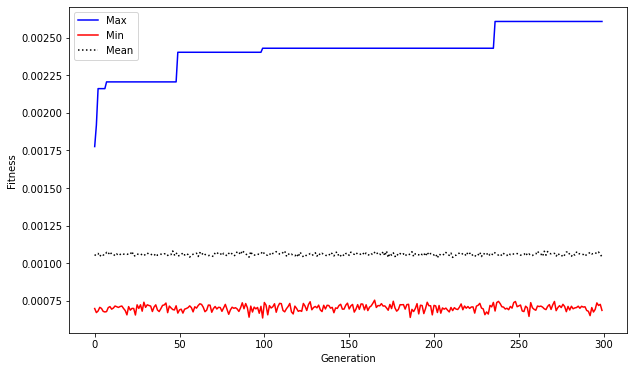

The plot was saved into the /content/GENOME_TOUR.png file.


In [ ]:
from pyevolve import G1DList
from pyevolve import Initializators
from pyevolve import Crossovers
from pyevolve import Mutators
from pyevolve import Selectors

from pyevolve import GSimpleGA

from utils import plot_tour_img, plot_evolution

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# ------------------------------------------------------------------------------
# cargar información de las coordenadas como pandas DataFrame
db = pd.read_csv('/content/roboticafcfm2021-2/tarea_02/docs/coordenadas.csv')

# cantidad total de objetos
CITIES = db.index.size

# puede obtener las coordenas (x, y) como un np.array del DataFrame
# mediante DataFrame.values
COORDS = db.values

# ------------------------------------------------------------------------------
# para visualizar el progreso del algoritmo genético definiremos una función
# de callback.
# esta función será llamada por el AG al final de cada generación
def stats_callback(GA_RUN):
  """
  -> None

  Agrega al DataFrame GA_STATS (global) las estadísticas de fitness de la
  generación correspondiente.

  :param GSimpleGA GA_RUN: Objeto del algoritmo genético siendo ejecutado.

  :return: None
  """

  # obtener generación actual
  gen_index = GA_RUN.getCurrentGeneration()

  # obtener estadísticas
  gen_stats = GA_RUN.getStatistics()

  # agregar datos al DataFrame
  global GA_STATS

  GA_STATS.at[gen_index, 'Max'] = gen_stats['rawMax']
  GA_STATS.at[gen_index, 'Min'] = gen_stats['rawMin']
  GA_STATS.at[gen_index, 'Mean'] = gen_stats['rawAve']

  return

# ------------------------------------------------------------------------------
# debido a que pyevolve no tiene un inicializador de orden, debe crear uno
# específico para esta ocasión.
def G1DListTSPInitializator(genome, **args):
  """
  -> pyevolve.genome

  Genera un orden aleatorio de la lista de valores [0, 1, ..., n-1] donde n
  corresponde al tamaño de la lista. Se puede considerar como un shuffle.

  :param pyevolve.genome genome: genoma G1DList a inicializar.

  :return: genoma modificado.
  """

  # limpiar lista del genoma
  genome.clearList()

  # obtener tamaño de la lista interna
  genome_size = genome.getListSize()

  # generar lista [0, 1, ..., n-1] y reordenarla aleatoriamente
  # ** considere usar random.shuffle() **
  lista_obj = [*range(genome_size)]
  random.shuffle(lista_obj)

  genome.genomeList = lista_obj

  return genome

# ------------------------------------------------------------------------------
# definir la función de evaluación del problema
def eval_fitness(chromosome):
  """
  -> float

  Calcula el fitness a partir de la distancia recorrida por el viajero siguiendo
  el itinerario contenido en chromosome.

  :param list chromosome: lista de ints que contiene el itinerario a recorrer.

  :return: fitness del individuo.
  """
  global db

  # recorra chromosome y calcule la distancia recorrida
  dist = 0.0
  db_copy = copy.deepcopy(db)
  # x_prev = 0
  # y_prev = 0
  for elem in range(len(chromosome)-1):
    idx = chromosome[elem]
    idx_1 = chromosome[elem + 1]
    x_prev = db_copy.at[idx, 'x']
    y_prev = db_copy.at[idx, 'y']
    x_obj = db_copy.at[idx_1, 'x'] - x_prev
    y_obj = db_copy.at[idx_1, 'y'] - y_prev
    dist += np.sqrt( x_obj ** 2 + y_obj**2 )


  # calcular el fitness
  # recuerde que el fitness debe ser siempre positivo y debe aumentar a medida
  # que se acerque a la solución.
  score = 5000/dist**2

  return score

# ------------------------------------------------------------------------------
# defina el número de individuos a contener en la población
POP_NUM = 400

# defina las probabilidades de cruzamiento y mutación
PROB_CROSS = 0.9 # 0.6
PROB_MUT = 0.9 # 0.7

# defina la cantidad de generaciones/iteraciones que desea ejecutar
GEN_ITER = 300

# inicializar DataFrame que guardará la información de la evolución del 
# algoritmo genético
GA_STATS = pd.DataFrame(index=np.arange(GEN_ITER), columns=['Max', 'Min', 'Mean'])

# ------------------------------------------------------------------------------
# configurar genoma
LIST_SIZE = CITIES
genome = G1DList.G1DList(LIST_SIZE)

# configurar evaluación del fitness
genome.evaluator.set(eval_fitness)

# configurar métodos de inicialización, cruzamiento y mutación
# ** revisar documentación **
genome.initializator.set(G1DListTSPInitializator)
genome.crossover.set( Crossovers.G1DListCrossoverEdge)
genome.mutator.set(Mutators.G1DListMutatorSwap )

# configurar ejecución del algoritmo genético
GA_RUN = GSimpleGA.GSimpleGA(genome)
GA_RUN.setGenerations(GEN_ITER)

# configurar población
GA_RUN.setPopulationSize(POP_NUM)

# configurar probabilidades
GA_RUN.setCrossoverRate(PROB_CROSS)
GA_RUN.setMutationRate(PROB_MUT)

# configurar método de selección
GA_RUN.selector.set(Selectors.GRouletteWheel)

# ejecutar algoritmo genético
GA_RUN.stepCallback.set(stats_callback)
GA_RUN.evolve()

# ------------------------------------------------------------------------------
# ** el código a continuación está completado **
# obtener mejor individuo
bestIndividual = GA_RUN.bestIndividual()

BEST_FITNESS = bestIndividual.getFitnessScore()
BEST_SCORE = bestIndividual.getRawScore()
BEST_GENOME = bestIndividual.getInternalList()

# display resultados
print('Generation: {:04d}'.format(GEN_ITER))
print('Best genome: ', BEST_GENOME)
print('     score: {:.3f}'.format(BEST_SCORE))
print('     fitness: {:.3f}'.format(BEST_FITNESS))

# ------------------------------------------------------------------------------
# plotear evolución del algoritmo genético y resultado
plot_evolution(GA_STATS)
plot_tour_img(COORDS, BEST_GENOME, '/content/GENOME_TOUR.png')

Responda:

1.   **¿Qué resultado obtuvo el algoritmo? Incluya una imagen con la ruta (Puede utilizar paint)**

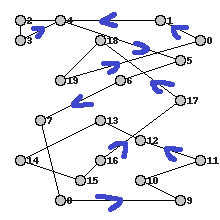

2.   **¿Parece óptimo este resultado?** No es el más óptimo: hay varios cambios "al ojo" posibles en la ruta que minimizan las distancias entre segmentos (como por ejemplo, haber conectado 7 con 14 y luego con 8, conectando para remediar 13 con 15 directamente).
3.   **Incluya el gráfico de fitness máximo vs generación, para distintos parámetros. Comente.**

Para 30 individuos en 100 iteraciones, con 0.6 prob. de cruzamiento y 0.7 de mutación:

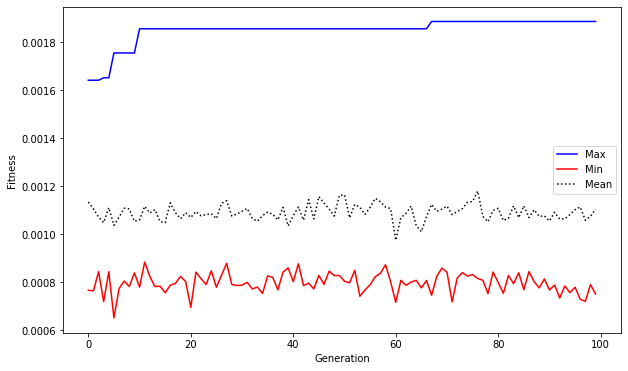

Para 200 individuos en 300 iteraciones, con 0.2 prob. de cruzamiento y 0.3 de mutación: 
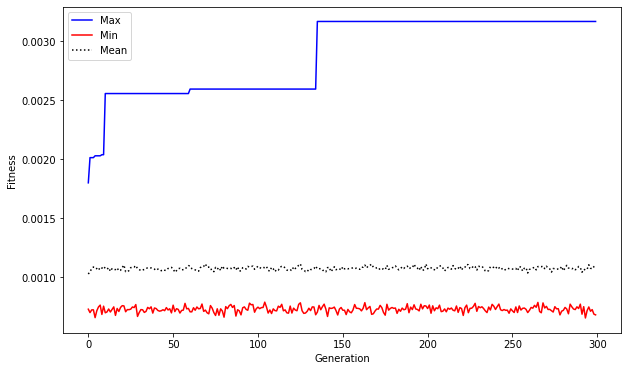

Se aprecia que con baja prob. de cruzamiento y mutación, se presenta poca variabilidad de media, en cambio, con probabilidades moderadas varía más. No obstante, al aumentar mucho las prob. de cruzamiento y mutación, tampoco se varía en exceso la media. Por último, con probabilidades muy bajas/muy altas, la variación de la máxima se produce de golpes en las generaciones, a diferencia de probabilidades más moderadas que presentan cambios más graduales.

# Problema 5
A continuación se implementará el algoritmo de Neuroevolution of Augmenting Topologies para entrenar una red neuronal capaz de dominar el juego [Flappy Bird](https://es.wikipedia.org/wiki/Flappy_Bird) sin intervención manual.

En primer lugar, para abordar este problema, es necesario contar con un emulador de Flappy Bird. En este caso, como Google Colab no permite display de ventanas pygame, la simulación será realizada en un segundo plano y luego, una vez entrenada la red se generará un video con OpenCV para visualizar el desempeño del mejor individuo. Convenientemente, la mayor parte de los componentes del juego ya se encuentran implementados en el módulo `utils.flappy` en el github del curso `roboticafcfm2021-2`.

En el siguiente bloque de código se ha implementado una demo bajo el nombre de `flappy_demo()`. Esta demo contiene todos los bloques necesarios para ejecutar el juego, desde la inicialización de los objetos principales (`Bird` y `Pipe`) hasta el `main loop` que finalmente se encarga de compilar cada frame del juego.

A modo de demostración `Bird` está programado para volar cada `12 frames` y cada vez que `Bird` colisiona con algún `Pipe`, este es restaurado a una posición segura.

Adicionalmente esta función `flappy_demo()` permite registrar o grabar el juego a un archivo `.mp4`. Para esto debe definir previamente un nombre de archivo `FILE_NAME` y habilitar la variable `RECORD`. Como ejemplo, ejecute el siguiente bloque de código.

In [ ]:
from utils.flappy import Bird
from utils.flappy import Pipe
from utils.flappy import renderFrame

import cv2

# tamaño del canvas
WIN_WIDTH = 288
WIN_HEIGHT = 512

# ---------------------------------------------------------------------------
# Flappy Bird DEMO
def flappy_demo():
  global RECORD
  global FILE_NAME

  # ---
  # INICIALIZAR OBJETOS
  # inicializar Bird
  bird = Bird(100, 225)

  # inicializar Pipes (se inicializan en el extremo derecho)
  pipes = [Pipe(WIN_WIDTH)]

  # ---
  # RECORD VIDEO
  if RECORD:
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    file_path = '/content/' + FILE_NAME
    out = cv2.VideoWriter(file_path, fourcc, 29.0, (WIN_WIDTH, WIN_HEIGHT))

  # ----------------------------------------------------------------------------
  # MAIN LOOP
  # inicializar frame_count
  frame_count = 0

  run = True
  # como demo se ejecutará el juego por 20 segs
  while run and frame_count<29*20:

    # ---
    # MOVER BIRD
    bird.move()

    # saltos de prueba para demo (esto no debería estar)
    if frame_count%12 == 0:
      bird.jump()

    # ---
    # MOVER PIPES
    for pipe in pipes:
      pipe.move()

      # ---
      # CHECK COLLISIONS
      # si Bird colisiona con pipe es game over
      if pipe.collide(bird):
        # corrección de posición como demo (esto no debería estar)
        bird.y = pipe.y

        # game over
        # run = False
      
      # agregar pipes para que el juego continue
      if pipe.x < bird.x and not(pipe.passed):
        pipe.passed = True
        pipes.append(Pipe(WIN_WIDTH))

      # eliminar pipes que ya salieron de la ventana de juego
      if (pipe.x + pipe.width) < 0:
        pipes.remove(pipe)
    
    # ---
    # RENDER VIDEO
    if RECORD:
      # dibujar frame de la ventana de juego
      canvas = renderFrame([bird], pipes)

      frame = canvas[:,:,:3]
      out.write(frame)

      if cv2.waitKey(1) & 0xFF == 27:
        break

    # incrementar contador de frames
    frame_count += 1

  # finalizar video
  if RECORD:
    out.release()

# ------------------------------------------------------------------------------
# ejecutar demo del juego
FILE_NAME = 'TEST_FLAPPY.mp4'
RECORD = True
flappy_demo()

Podrá notar que en la carpeta `/content/` se ha creado el archivo `TEST_FLAPPY.mp4`. Este archivo puede ser descargado y visualizado en su computador.

Ahora falta incorporar NEAT como controlador del juego. En este sentido, cada uno de los genomas creados por NEAT se corresponderá con una red neuronal que, a partir de la información del juego (`bird.y`, `pipe.y`, `pipe.y + pipe.gap`) como `input`, retorna como `output` un valor entre -1 y 1. En este caso si el `output` es mayor que 0 se interpretará como que `bird` debe volar.

<div align="center"> <img src="https://raw.githubusercontent.com/cherrerab/roboticafcfm/master/tarea_02/bin/flappy_diagram.png" height="400"> </div>

Como cualquier algoritmo genético, para evaluar cada uno de los genomas es necesario definir un función de fitness `eval_genomes`. En este caso, el fitness de un `bird` está dado por su `score` en el juego el cual es directamente proporcional a la cantidad de `frames` que ha sobrevivido en la ejecución del juego.

Tomando como plantilla la función `flappy_demo()`, modifique esta para crear una función `eval_genomes` que sea compatible con NEAT. Puede revisar la [documentación de NEAT](https://neat-python.readthedocs.io/en/latest/xor_example.html) o el ejemplo de la `auxiliar_05` para guiarse.

In [ ]:
def eval_genomes(genomes, config):
  """
  Ejecuta una simulación del juego asignando a cada red contenida en genomes un
  Bird con el fin de obtener su fitness.

  El fitness de cada Bird dependerá del score que obtenga durante la simulación.
  """
  global RECORD
  global FILE_NAME

  # INITIALIZE BIRDS
  # comience por crear tres listas que contengan los genomas, las redes
  # asociadas a los genomas, y los Birds correspondientes
  # genms, nets, birds


  # por cada uno de los genomas
  for genome_id, genome in genomes:
    # inicializar su fitness a cero, genome.fitness
    

    # compilar su red neuronal correspondiente
    # neat.nn.FeedForwardNetwork.create
    net = 

    # inicializar su bird asociado, Bird(100, 225)


    # agregar estos elementos a sus correpondientes listas


  # ---
  # INITIALIZE PIPES
  pipes = [Pipe(WIN_WIDTH)]

  # ---
  # RECORD VIDEO
  if RECORD:
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    file_path = '/content/' + FILE_NAME
    out = cv2.VideoWriter(file_path, fourcc, 29.0, (WIN_WIDTH, WIN_HEIGHT))

  # inicializar frame_count
  frame_count = 0

  run = True
  # correr mientras exista un Bird que no haya perdido o no se supere
  # el minuto de juego
  while run and (frame_count < 29*60):
    # ---
    # BREAK CONDITION
    # si no quedan Birds en juego, finalizar


    # ---
    # APPLY NETWORKS
    # determinar cual es el Pipe de interés, pipe_idx



    # ---
    # MOVE BIRDS
    # mover Birds (bird.move()), incrementar su fitness y mediante el output de
    # su red neuronal determinar si debe saltar (bird.jump())
    for i, bird in enumerate(birds):
      # mover bird


      # incrementar fitness de genms[i]


      # obtener INPUTS para la red net[i]
      INPUT_0 = 
      INPUT_1 = 
      INPUT_2 = 

      # las redes neat.nn.FeedForwardNetwork poseen el método .activate()
      OUTPUT = 

      # si el output es mayor que cero, volar
      if OUTPUT[0] > 0.0:



    # mover Pipes
    for pipe in pipes:
      pipe.move()

      # CHECKEAR COLISIONES
      # si algún Bird colisiona con pipe es game over para ese Bird
      # debe removerlo de la lista de Birds, así como también su red y genoma
      # de las listas correspondientes.
      for bird in birds:
        if pipe.collide(bird):

          # disminuir fitness

          # remover elementos de las listas

      
      # agregar pipes para que el juego continue
      if (pipe.x < bird.x) and not(pipe.passed):
        pipe.passed = True
        pipes.append(Pipe(WIN_WIDTH))

      # eliminar pipes que ya salieron de la ventana de juego
      if (pipe.x + pipe.width) < 0:
        pipes.remove(pipe)
    

    # RECORD VIDEO
    if RECORD:
      # dibujar frame de la ventana de juego
      canvas = renderFrame(birds, pipes)

      frame = canvas[:,:,:3]
      out.write(frame)

      if cv2.waitKey(1) & 0xFF == 27:
        break

    # incrementar contador de frames
    frame_count += 1
  
  # finalizar video
  if RECORD:
    out.release()

Ahora, para correr el algoritmo de NEAT es necesario instalar la librería neat-python. Esto lo puede hacer en el siguiente bloque de código.

In [ ]:
! pip install neat-python

Una vez finalizada la función `eval_genomes`, puede ejecutar el siguiente y último bloque de código. Para configurar los parámetros principales de NEAT se entrega el archivo `/content/roboticafcfm2021-2/tarea_02/docs/config-feedforward.txt`. No obstante, sientase libre de modificarlo y subir uno personalizado, solo tenga cuidado de modificar la ubicación de `config_path`.

In [ ]:
import neat

# ------------------------------------------------------------------------------
def run_neat(config_file):
    """
    -> None

    Ejecuta el algoritmo de NEAT para entrenar una red neuronal que domine
    el juego de Flappy Bird.

    :param config_file: path del archivo de configuración config-feedforward.txt

    :return: None
    """
    global FILE_NAME; FILE_NAME = 'TRAINED_FLAPPY.mp4'
    global RECORD

    config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # inicializar la población de genomas
    p = neat.Population(config)
    p.add_reporter(neat.StdOutReporter(True))

    # entrenar por 50 generaciones
    RECORD = False   
    winner = p.run(eval_genomes, 50)

    # registrar generación en video
    RECORD = True
    p.run(eval_genomes, 1)

# ------------------------------------------------------------------------------
config_path = '/content/roboticafcfm2021-2/tarea_02/docs/config-feedforward.txt'

run_neat(config_path)

Responda,

-  En vez de entrenar la población por 50 generaciones, entrenela por solo 5 generaciones y analice su desempeño. ¿Es lo que esperaba? ¿Por no es necesario tanto entrenamiento?

# Entrega
Una vez finalizada su tarea, descargue el archivo .ipynb (Archivo > Descargar .ipynb) y entregue este archivo junto al mapa de la pregunta 4 y al archivo .mp4 de su mejor generación de Flappy Bird en u-cursos.

En resumen, debe entregar los siguientes archivos.

    Archivo .ipynb de su colab.
    Archivo .jpg o .png del mapa del TSP
    Archivo .mp4 de la mejor generación de Flappy Bird.
